# Python Analysis Project

In [1296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import norm

## ***Reading In and Organizing Data:***

In [880]:
advanced_stats = pd.read_csv('./Baseball Data/Fangraphs Leaderboard (Advanced).csv')
standard_stats = pd.read_csv('./Baseball Data/FanGraphs Leaderboard (Standard).csv')
pitch_arsenal = pd.read_csv('./Baseball Data/Pitch_Arsenal_2017-2021.csv') 
#####################################################################################################################

# pitch_info_hm = pd.read_csv('./Baseball Data/FanGraphs Leaderboard (Pitch Info H-Movement).csv')
# pitch_info_pd = pd.read_csv('./Baseball Data/FanGraphs Leaderboard (Pitch Info Plate Discipline).csv')
# pitch_info_velo = pd.read_csv('./Baseball Data/FanGraphs Leaderboard (Pitch Info Velo).csv')
# pitch_info_vm = pd.read_csv('./Baseball Data/FanGraphs Leaderboard(Pitch Info Vertical Movement).csv')
# pitch_type = pd.read_csv('./Baseball Data/FanGraphs Leaderboard (Pitch Info Pitch Type).csv')

######################################################################################################################

#batted_ball = pd.read_csv('./Baseball Data/FanGraphs Leaderboard Batted Ball Stats.csv')

In [881]:
pd.set_option('display.max_columns', None)

In [1043]:
pd.set_option('display.max_rows', None)

In [882]:
#standard_stats

- **Merging Advanced and Standard Stats**

In [884]:
standard_stats = standard_stats.drop('Team',axis = 1)

In [891]:
std_adv = pd.merge(standard_stats,advanced_stats, on = ["Name","playerid","ERA"])
#std_adv

In [892]:
std_adv = std_adv.drop('Team',axis = 1)

In [893]:
first_column = std_adv.pop('playerid')
std_adv.insert(0, 'playerid', first_column)

In [894]:
#std_adv = std_adv.dropna(axis=1, how='all', thresh=None, subset=None)

In [1163]:
#std_adv

**Savant pitch keys**

- ff = 4 seam
- sl = slider
- ch = changeup
- cu = curveball
- si = sinker
- fc = cut fastball
- fs = split fastball
- kn = knuckleball

**Fangraphs Pitch Keys**

- FA = fourseam or unclassified fastballs
- FT = two seam fastball
- FC = cut fastball
- FS = split fastball
- FO = forkball
- SI = sinker
- SL = slider
- CU = curveball
- KC = knuckle curve
- EP = Ephes
- CH = changeup
- SC = screwball
- KN = knuckleball
- UN = unknowns

**Statcast Pitch Arsenal Data 2017-2021 from Baseball Savant**

In [854]:
pitch_arsenal = pd.read_csv('./Baseball Data/Pitch_Arsenal_2017-2021.csv') 

In [855]:
pitch_arsenal['Name'] = [f'{first.strip()} {last.strip()}' for first,last in 
                         zip(pitch_arsenal[list(pitch_arsenal.columns)[1]],pitch_arsenal[list(pitch_arsenal.columns)[0]])]

In [856]:
first_column = pitch_arsenal.pop('Name')
pitch_arsenal.insert(0, 'Name', first_column)

In [857]:
cols = [c.strip() for c in list(pitch_arsenal.columns)]
pitch_arsenal.columns = cols

In [858]:
agg_counts = pitch_arsenal[['Name','out_zone','pitch_count_offspeed','pitch_count_fastball',
                            'pitch_count_breaking','pitch_count','in_zone',
                           'batted_ball','groundballs','flyballs','linedrives',
                           'pitch_hand','n']].groupby(by = 'Name')\
                            .sum().sort_values(by = 'pitch_count',ascending = False)
agg_counts = agg_counts.reset_index()

In [859]:
sums = ['out_zone','pitch_count_offspeed','pitch_count_fastball',
                            'pitch_count_breaking','pitch_count','in_zone',
                           'batted_ball','groundballs','flyballs','linedrives',
                           'pitch_hand','n']

In [860]:
pitch_arsenal_ave = pitch_arsenal.drop(sums, axis = 1).groupby(by = 'Name').mean()

In [861]:
agg_pitch_arsenal = pd.merge(agg_counts,pitch_arsenal_ave, on = ['Name'])
#agg_pitch_arsenal.rename(columns = {'p_total_pa':'total_batters_faced'}, inplace = True)

## ***Visualizing Data:***

- **Correlations**

- fangraphs standard and advanced stat correlations

In [897]:
std_adv_corr = pd.DataFrame(std_adv.drop(['SV','HLD','BS'],axis = 1).corr())
#std_adv_corr = pd.DataFrame(std_adv.corr()).dropna(how = 'all')

In [1162]:
fig = px.imshow(std_adv_corr,width=750, height=750,color_continuous_scale = 'spectral',
               title = 'Standard, Advanced, and Batted Ball Statistical Categories Heatmap')
#fig.show()

In [1037]:
fg_30 = {col:std_adv_corr[f'{col}'].apply(abs).sort_values(ascending = False)[1:31] for col in list(std_adv_corr.columns)}

- Statcast and fangraphs stat correlations

In [1218]:
fg_sav = pd.merge(std_adv,agg_pitch_arsenal,on = 'Name')
#fg_sav.sort_values(by = 'pitch_count', ascending = False).head(10)

In [1283]:
fg_sav_corr = pd.DataFrame(fg_sav.corr())
fig = px.imshow(fg_sav_corr,width=1000, height=1000,color_continuous_scale = 'spectral',
               title = '')
#fig.show()

- Statcast data correlations

In [1031]:
savant_data_corr = pd.DataFrame(agg_pitch_arsenal.corr())

In [1038]:
fig = px.imshow(savant_data_corr,width=1000, height=1000,color_continuous_scale = 'spectral',
               title = '')
#fig.show()

- **Baseball Savant Column Features**

In [1394]:
#print(pd.Series(fg_sav_corr.columns))

In [1222]:
abs(fg_sav_corr['BABIP']).sort_values()

year                     0.000339
xFIP-                    0.002726
swing_percent            0.003184
sl_avg_break_z           0.003510
xFIP                     0.007399
si_avg_speed             0.007801
batted_ball              0.008016
n_breaking_formatted     0.008511
breaking_avg_break_z     0.008901
oz_swing_miss_percent    0.012902
oz_contact_percent       0.014475
ff_range_speed           0.015057
fs_avg_break             0.015754
BB/9                     0.021784
ch_avg_spin              0.022644
si_range_speed           0.022725
offspeed_avg_speed       0.026183
n_fastball_formatted     0.026496
xiso                     0.026807
BK                       0.026923
fc_avg_speed             0.028653
HR/9                     0.034254
WP                       0.034596
IBB                      0.035031
pitch_count_breaking     0.037039
n_offspeed_formatted     0.040226
fc_avg_break_z           0.040601
ch_avg_break_z           0.042712
ff_avg_speed             0.043994
offspeed_avg_s

## **Investigating Batting Average on Balls in Play**

**Normality Test:**

In [1292]:
statistic,p_value = shapiro(fg_sav['BABIP'])
print(f"P_Value = {p_value} > .05")
print("Thus we maintain the null hypothesis that BABIP is normally distributed.")

P_Value = 0.21063052117824554 > .05
Thus we maintain the null hypothesis that BABIP is normally distributed.


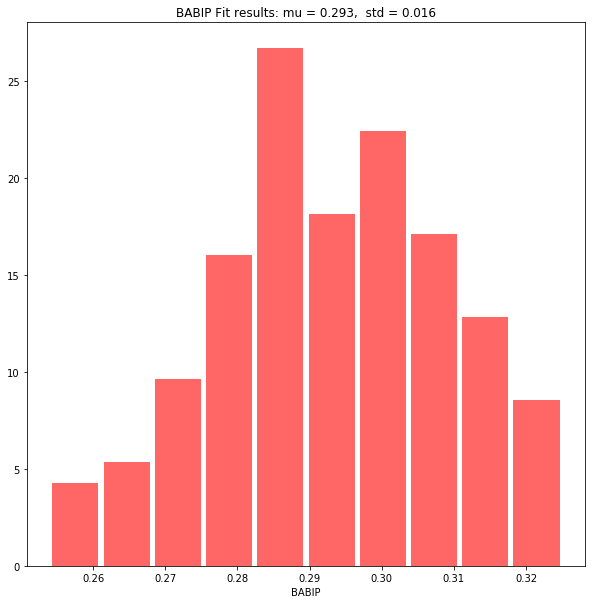

In [1399]:
fig,ax = plt.subplots()
fig.set_size_inches(10,10)

mu, std = norm.fit(fg_sav['BABIP'])

plt.hist(fg_sav['BABIP'], bins=10, density=True, alpha=0.6, color='r',rwidth = .9)
xmin, xmax = plt.xlim()
x = np.linspace(.2,.375,1000)
p = norm.pdf(x, mu, std)
#plt.plot(x, p, linewidth=2)
title = f"BABIP Fit results: mu = {round(mu,3)},  std = {round(std,3)}" 
plt.title(title)
plt.xlabel('BABIP')
#plt.ylabel('Count')
plt.show()

In [1358]:
fig = px.scatter(fg_sav, x="popups_percent", y="BABIP",
                 size = 'pitch_count',color ="IP",
                 hover_name="Name", log_x=False, size_max=15, width=700, height=700,
                 title = "BABIP VS. Popup%")
fig.add_hline(y=mu)
fig.add_vline(x = np.mean(fg_sav['popups_percent']))
fig.show()

In [1357]:
fig = px.scatter(fg_sav, x="groundballs_percent", y="BABIP",
                 size = 'pitch_count',color ="IP",
                 hover_name="Name", log_x=False, size_max=15, width=700, height=700,
                 title = "BABIP VS. Ground Ball%")
fig.add_hline(y=mu)
fig.add_vline(x = np.mean(fg_sav['groundballs_percent']))
fig.show()

In [1356]:
fig = px.scatter(fg_sav, x="flyballs_percent", y="BABIP",
                 size = 'pitch_count',color ="IP",
                 hover_name="Name", log_x=False, size_max=15, width=700, height=700,
                 title = "BABIP VS. Flyball%")
fig.add_hline(y=mu)
fig.add_vline(x = np.mean(fg_sav['flyballs_percent']))
fig.show()

In [1359]:
fig = px.scatter(fg_sav, x="exit_velocity_avg", y="BABIP",
                 size = 'pitch_count',color ="IP",
                 hover_name="Name", log_x=False, size_max=15, width=700, height=700,
                 title = "BABIP VS. avg Exit Velocity")
fig.add_hline(y=mu)
fig.add_vline(x = np.mean(fg_sav['exit_velocity_avg']))
fig.show()

In [1360]:
fig = px.scatter(fg_sav, x="barrel_batted_rate", y="BABIP",
                 size = 'pitch_count',color ="IP",
                 hover_name="Name", log_x=False, size_max=15
                 , width=700, height=700,
                 title = "BABIP VS. Barrel%")
fig.add_hline(y=mu)
fig.add_vline(x = np.mean(fg_sav['barrel_batted_rate']))
fig.show()

In [1361]:
fig = px.scatter(fg_sav, x="sweet_spot_percent", y="BABIP",
                 size = 'pitch_count',color ="IP",
                 hover_name="Name", log_x=False, size_max=15
                 , width=700, height=700,
                 title = "BABIP VS. Sweet Spot%")
fig.add_hline(y=mu)
fig.add_vline(x = np.mean(fg_sav['sweet_spot_percent']))
fig.show()

In [1363]:
fig = px.scatter(fg_sav, x="launch_angle_avg", y="BABIP",
                 size = 'pitch_count',color ="IP",
                 hover_name="Name", log_x=False, size_max=15
                 , width=700, height=700,
                 title = "BABIP VS. Avg Launch Angle")

fig.add_hline(y=mu)
fig.add_vline(x = np.mean(fg_sav['launch_angle_avg']))

fig.show()

## **Investigating ERA:**

In [1227]:
abs(fg_sav_corr['ERA']).sort_values(ascending = False)

ERA                      1.000000
ERA-                     0.969085
WHIP                     0.855332
FIP                      0.850937
FIP-                     0.829112
LOB%                     0.811504
AVG                      0.803464
xwoba                    0.729900
xFIP                     0.729671
xFIP-                    0.729417
SIERA                    0.715327
HR/9                     0.693148
xslg                     0.688195
K-BB%                    0.680751
xobp                     0.670433
xba                      0.645016
K%                       0.643098
K/BB                     0.639511
W                        0.581801
xiso                     0.581421
SO                       0.569092
K/9                      0.566169
whiff_percent            0.554467
fs_avg_spin              0.508288
iz_contact_percent       0.489766
z_swing_miss_percent     0.479572
n_fs_formatted           0.477539
BABIP                    0.449032
E-F                      0.444021
oz_swing_miss_

In [1365]:
statistic,p_value = shapiro(fg_sav['ERA'])
print(f"P_Value = {p_value} > .05")
print("Thus we maintain the null hypothesis that ERA is normally distributed.")

P_Value = 0.7733370065689087 > .05
Thus we maintain the null hypothesis that ERA is normally distributed.


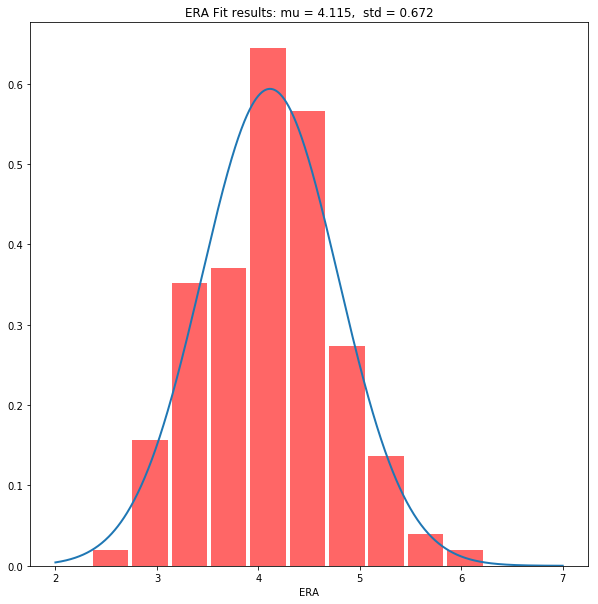

In [1403]:
fig,ax = plt.subplots()
fig.set_size_inches(10,10)

mu, std = norm.fit(fg_sav['ERA'])

plt.hist(fg_sav['ERA'], bins=10, density=True, alpha=0.6, color='r',rwidth = .9)
xmin, xmax = plt.xlim()
x = np.linspace(2,7,1000)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2)
title = f"ERA Fit results: mu = {round(mu,3)},  std = {round(std,3)}" 
plt.title(title)
plt.xlabel('ERA')
#plt.ylabel('Count')
plt.show()

In [1368]:
fig = px.scatter(fg_sav, x="BABIP", y="ERA",
                 size = 'pitch_count',color ="IP",
                 hover_name="Name", log_x=False, size_max=15, width=700, height=700,
                 title = "ERA VS. BABIP Starting Pitchers from 2017-2021")


fig.add_hline(y=mu)
fig.add_vline(x = np.mean(fg_sav['BABIP']))

fig.show()

In [1369]:
fig = px.scatter(fg_sav, x="BABIP", y="E-F",
                 size = 'pitch_count',color ="IP",
                 hover_name="Name", log_x=False, size_max=15
                 , width=700, height=700,
                 title = "E-F VS. BABIP")


fig.add_hline(y= np.mean(fg_sav['E-F']))
fig.add_vline(x = np.mean(fg_sav['BABIP']))

fig.show()

In [1395]:
fig = px.scatter(fg_sav, x="BABIP", y="ERA",
                 size = 'pitch_count',color ="IP",
                 hover_name="Name", log_x=False, size_max=15
                 , width=700, height=700,
                 title = "ERA VS. BABIP")


fig.add_hline(y= np.mean(fg_sav['ERA']))
fig.add_vline(x = np.mean(fg_sav['BABIP']))

fig.show()

In [1378]:
fig = px.scatter(fg_sav, x="K%", y="ERA",
                 size = 'pitch_count',color ="IP",
                 hover_name="Name", log_x=False, size_max=15, width=700, height=700,
                 title = "ERA VS. K%")


fig.add_hline(y= mu)
fig.add_vline(x = np.mean(fg_sav['K%']))

fig.show()

In [1375]:
fig = px.scatter(fg_sav, x="BB%", y="ERA",
                 size = 'pitch_count',color ="IP",
                 hover_name="Name", log_x=False, size_max=15, width=700, height=700,
                 title = "ERA VS. BB%")


fig.add_hline(y = mu)
fig.add_vline(x = np.mean(fg_sav['BB%']))

fig.show()

In [1374]:
fig = px.scatter(fg_sav.sort_values(by = 'K-BB%',ascending = True), x="K-BB%", y="ERA",
                 size = 'pitch_count',color ="IP",
                 hover_name="Name", log_x=False, size_max=15, width=700, height=700,
                 title = "ERA VS. K-BB%")


fig.add_hline(y = mu)
fig.add_vline(x = np.mean(fg_sav['K-BB%']))

fig.show()

In [1379]:
fig = px.scatter(fg_sav.sort_values(by = 'K%',ascending = False), x="BB%", y="K%",
                 size = 'pitch_count',color ="K-BB%",
                 hover_name="Name", log_x=False, size_max=15, width=700, height=700,
                 title = "K% VS. BB% Starting Pitchers from 2017-2021")


fig.add_hline(y = np.mean(fg_sav['K%']))
fig.add_vline(x = np.mean(fg_sav['BB%']))

fig.show()

In [1380]:
fig = px.scatter(fg_sav, x="WHIP", y="ERA",
                 size = 'pitch_count',color ="IP",
                 hover_name="Name", log_x=False, size_max=15
                 , width=700, height=700,
                 title = "ERA VS. WHIP")


fig.add_hline(y = mu)
fig.add_vline(x = np.mean(fg_sav['WHIP']))

fig.show()

In [1385]:
fig = px.scatter(fg_sav, x="K%", y="WHIP",
                 size = 'IP',color ="ERA",
                 hover_name="Name", log_x=False, size_max=15
                 , width=700, height=700,
                 title = "WHIP VS. K%")

fig.add_hline(y = np.mean(fg_sav['WHIP']))
fig.add_vline(x = np.mean(fg_sav['K%']))

fig.show()

In [1413]:
fig = px.scatter(fg_sav.sort_values(by = 'ERA',ascending = True), x="ERA", y="FIP",
                 size = 'pitch_count',color ="E-F",
                 hover_name="Name", log_x=False, size_max=15, width=700, height=700,
                 title = "FIP vs ERA")

fig.add_hline(y = np.mean(fg_sav['FIP']))
fig.add_vline(x = np.mean(fg_sav['ERA']))

fig.show()

In [1425]:
fig = px.scatter(fg_sav.sort_values(by = 'ERA',ascending = True), x="K-BB%", y="E-F",
                 size = 'pitch_count',color ="IP",
                 hover_name="Name", log_x=False, size_max=15, width=700, height=700,
                 title = "E-F vs K-BB%")

fig.add_hline(y = np.mean(fg_sav['E-F']))
fig.add_vline(x = np.mean(fg_sav['K-BB%']))

fig.show()

In [1417]:
abs(fg_sav_corr['FIP']).sort_values(ascending = False)

FIP                      1.000000
FIP-                     0.986356
xFIP                     0.911038
xFIP-                    0.910651
SIERA                    0.886949
ERA                      0.850937
ERA-                     0.837751
K-BB%                    0.832996
WHIP                     0.815618
xwoba                    0.810969
K/BB                     0.778687
K%                       0.769730
xslg                     0.762752
xobp                     0.747362
HR/9                     0.744938
K/9                      0.715954
AVG                      0.704308
xba                      0.683694
whiff_percent            0.679108
xiso                     0.669278
SO                       0.608114
oz_swing_miss_percent    0.606760
oz_contact_percent       0.598317
iz_contact_percent       0.552531
z_swing_miss_percent     0.544531
LOB%                     0.539008
W                        0.526197
BB/9                     0.473758
n_fs_formatted           0.446833
ff_avg_speed  